<a href="https://colab.research.google.com/github/HilbertN/Redes_Neuronales/blob/main/RN2_PrimeraRedDensaKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers

In [2]:
learning_rate = 0.001
epochs = 30
batch_size = 120

In [3]:
dataset=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
type(dataset)

tuple

In [10]:
len(dataset)

2

In [11]:
dataset[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [13]:
import numpy as np
dat=np.array(dataset)
print(dat[1,1].shape)
(x_train, y_train), (x_test, y_test) = dataset

(10000,)


<ipython-input-13-fd1065b11d44>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dat=np.array(dataset)


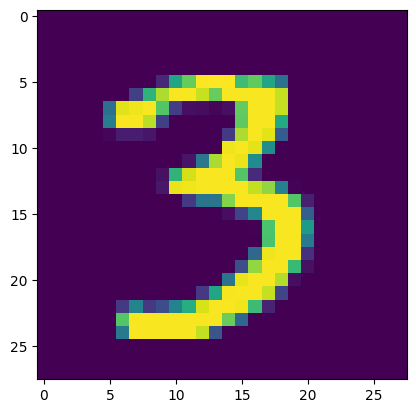

In [14]:
import matplotlib.pyplot as plt
plt.imshow(dat[0,0][10000])

In [15]:
x_train.shape

(60000, 28, 28)

In [19]:
x_trainv = x_train.reshape(60000, 784)#Cambiamos la dimensión de (60000,28,28) a (60000,784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')#Las redes suelen funcionar mejor con datos tipo flotante
x_testv = x_testv.astype('float32')

#Escalar datos puedo ayudar a evitar el problema de saturación de la neurona
x_trainv /= 255  # x_trainv = x_trainv/255
x_testv /= 255

In [20]:
print(y_train[10000])

3


In [22]:
num_classes=10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

In [23]:
y_trainc[10000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [50]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=learning_rate),metrics=['accuracy'])

In [45]:
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

Epoch 1/30
500/500 [==============================] - 3s 6ms/step - loss: 2.2619 - accuracy: 0.2061 - val_loss: 2.2032 - val_accuracy: 0.2987
Epoch 2/30
500/500 [==============================] - 2s 5ms/step - loss: 2.1653 - accuracy: 0.3995 - val_loss: 2.1204 - val_accuracy: 0.4911
Epoch 3/30
500/500 [==============================] - 2s 5ms/step - loss: 2.0860 - accuracy: 0.5384 - val_loss: 2.0410 - val_accuracy: 0.5866
Epoch 4/30
500/500 [==============================] - 2s 5ms/step - loss: 2.0096 - accuracy: 0.6080 - val_loss: 1.9647 - val_accuracy: 0.6440
Epoch 5/30
500/500 [==============================] - 2s 5ms/step - loss: 1.9361 - accuracy: 0.6510 - val_loss: 1.8912 - val_accuracy: 0.6756
Epoch 6/30
500/500 [==============================] - 3s 6ms/step - loss: 1.8650 - accuracy: 0.6766 - val_loss: 1.8201 - val_accuracy: 0.6951
Epoch 7/30
500/500 [==============================] - 2s 5ms/step - loss: 1.7964 - accuracy: 0.6943 - val_loss: 1.7516 - val_accuracy: 0.7237
Epoch 

In [46]:
score = model.evaluate(x_testv, y_testc, verbose=1) #evaluar la eficiencia del modelo

313/313 [==============================] - 1s 2ms/step - loss: 0.8531 - accuracy: 0.8363


In [47]:
print(score)

[0.8531410098075867, 0.8363000154495239]


In [33]:
a=model.predict(x_testv) #predicción de la red entrenada

313/313 [==============================] - 0s 1ms/step


In [34]:
print(a.shape)

(10000, 10)


In [35]:
print(a[1])

[0.63785934 0.60652    0.89604485 0.843632   0.09399487 0.77790356
 0.83682543 0.10710023 0.62697864 0.11676896]


In [37]:
print("resultado correcto:")
print(y_testc[1])

resultado correcto:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [39]:
#Para guardar el modelo en disco
#model.save("red.h5")

In [41]:
#para cargar la red:
modelo_cargado = tf.keras.models.load_model('red.h5')

In [49]:
score1 = modelo_cargado.evaluate(x_testv, y_testc, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.8566 - accuracy: 0.8377
